# Übung 9 Neuronales Netzwerk - Rainier Robles & Valentin Wolf

In [1]:
import pandas as pd
import numpy as np
from random import randint
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def sigmoid(x):
    return (1 / (1+np.exp(-x)))

def sigmoid_derivative(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [ ]:
class NeuralNetwork():
    
    """defining for a multi-layer Neural Network"""
    
    def __init__(self,train_data,train_labels,units):
        """
        train_data = normalized training data with 1 already appended at the end
        train_labels = vectorized labels for training_data, 1 for actual class, 0 otherwise
        units = list containing number of units for hidden layer as well as number of classes
        """
        units.insert(0,train_data.shape[1])
        self.units = units
        self.layers = len(self.units)
        self.train_data, self.train_labels = train_data, train_labels
        np.random.seed(0)
        self.weights = []
        for i in range(self.layers-1):
            self.weights.append(np.random.randn(self.units[i],self.units[i+1]))
        self.success_rates = [] # so we can plot them later
            
    def feed_forward(self,data):
        sigmoid_v = sigmoid#np.vectorize(sigmoid)
        sigmoid_d_v = sigmoid_derivative#np.vectorize(sigmoid_derivative)
        self.sigmoid_results = [data]
        self.sigmoid_d_results = []
        for i in range(self.layers-1):
            self.sigmoid_results.append([])
            self.sigmoid_d_results.append([])
        for layer in range(self.layers-1):
            for row in range(data.shape[0]):
                product = np.dot(self.sigmoid_results[layer][row],self.weights[layer])
                self.sigmoid_results[layer+1].append(sigmoid_v(product))
                self.sigmoid_d_results[layer].append(sigmoid_d_v(product))
                
    def error_derivative(self):
        self.errors = np.array(self.sigmoid_results[-1]) - self.train_labels
        
    def backprop(self):
        self.deltas = []
        for layer in range(self.layers-1):
            self.deltas.append([])        
        for row in range(self.train_data.shape[0]):
            D = np.diag(self.sigmoid_d_results[-1][row])
            err = self.errors[row].reshape(self.errors.shape[1],1)
            delta = np.dot(D,err)
            self.deltas[0].append(delta)
            for x in range(self.layers-2):
                D_i = -(x+2)
                w_i = -(x+1)
                D = np.diag(self.sigmoid_d_results[D_i][row])
                w = self.weights[w_i]
                delta_i = self.deltas[x][row]
                delta = np.dot(np.dot(D,w),delta_i)
                self.deltas[x+1].append(delta)
            
    def correct(self,gamma):
        for row in range(self.train_data.shape[0]):
            for x in range(self.layers-1):
                d = self.deltas[x][row].T
                o_i = -(x+2)
                wt_i = -(x+1)
                o = self.sigmoid_results[o_i][row].reshape(self.sigmoid_results[o_i][row].shape[0],1)
                Delta = -gamma * np.dot(o,d)
                self.weights[wt_i] = self.weights[wt_i] + Delta
            
    def check_class(self):
        self.class_check = np.zeros((self.train_labels.shape))
        for row in range(self.train_labels.shape[0]):
            self.class_check[row,int(self.sigmoid_results[-1][row].argmax())] += 1
            
    def accuracy_check(self):
        total = self.train_labels.shape[0]
        correct = 0
        for row in range(total):
            if np.array_equal(self.train_labels[row],self.class_check[row]):
                correct += 1
        return (correct/total)
    
    def train(self,iterations=100,gamma=0.05,printfreq=25):
        for iteration in range(iterations):
            self.feed_forward(self.train_data)
            self.check_class()
            if iteration % printfreq == 0 or iteration == iterations-1:
                print("Iteration {} | Accuracy: {}".format(iteration,self.accuracy_check()))
            self.success_rates.append(self.accuracy_check())
            self.error_derivative()
            self.backprop()
            self.correct(gamma)
            
    def predict(self,test_data,test_labels):
        self.test_data, self.test_labels = test_data, test_labels
        self.feed_forward(self.test_data)
        predictions = []
        for row in range(self.test_data.shape[0]):
            predictions.append(int(self.sigmoid_results[-1][row].argmax()))
        self.pred_array = np.array(predictions)
        
    def error_rate(self):
        bools = np.equal(self.pred_array,self.test_labels.flatten())
        correct = np.sum(bools)
        return (self.test_labels.shape[0]-correct)/self.test_labels.shape[0]
        #return pred
        
    def confusion_matrix(self):
        self.confusion = np.zeros((self.units[-1],self.units[-1]))
        for row in range(self.test_labels.shape[0]):
            self.confusion[int(self.test_labels[row]),int(self.pred_array[row])] += 1
        return self.confusion

In [4]:
trainset = np.loadtxt('zip.train')

constant_coefficient = np.ones((trainset.shape[0],1))
train_data = np.concatenate((trainset[:,1:],constant_coefficient),axis=-1)

In [5]:
train_labels = np.zeros((trainset.shape[0],10))
for i in range(trainset.shape[0]):
    train_labels[i,int(trainset[i,0])] += 1

In [6]:
nn = NeuralNetwork(train_data,train_labels,[30,10])
nn.train(gamma=0.0008)

Iteration 0 | Accuracy: 0.05815388835550679
Iteration 25 | Accuracy: 0.43491976409271704
Iteration 50 | Accuracy: 0.4892333013304074
Iteration 75 | Accuracy: 0.5351803593471403
Iteration 99 | Accuracy: 0.5649430805102181


In [7]:
nn2 = NeuralNetwork(train_data,train_labels,[100,50,10])
nn2.train(iterations=500,gamma=0.001)

Iteration 0 | Accuracy: 0.08174461665066521
Iteration 25 | Accuracy: 0.30325058291043755
Iteration 50 | Accuracy: 0.3656562885749554
Iteration 75 | Accuracy: 0.4068029076944178
Iteration 100 | Accuracy: 0.4594705801673296
Iteration 125 | Accuracy: 0.4733232752708819
Iteration 150 | Accuracy: 0.4943080510218077
Iteration 175 | Accuracy: 0.5362776025236593
Iteration 200 | Accuracy: 0.5842819914963654
Iteration 225 | Accuracy: 0.5993690851735016
Iteration 250 | Accuracy: 0.6103415169386915
Iteration 275 | Accuracy: 0.6217254148950762
Iteration 300 | Accuracy: 0.6571115073378138
Iteration 325 | Accuracy: 0.6894801810451241
Iteration 350 | Accuracy: 0.7657385818131943
Iteration 375 | Accuracy: 0.8343162803456317
Iteration 400 | Accuracy: 0.8625702921409958
Iteration 425 | Accuracy: 0.8945274996571115
Iteration 450 | Accuracy: 0.9100260595254424
Iteration 475 | Accuracy: 0.9182553833493348
Iteration 499 | Accuracy: 0.9268961733644219


In [14]:
testset = np.loadtxt('zip.test')
constant_coefficient = np.ones((testset.shape[0],1))
test_data = np.concatenate((testset[:,1:],constant_coefficient),axis=-1)
test_labels = testset[:,0]

error rate for test set = 0.151968111609
[[ 342.    0.    5.    1.    3.    1.    4.    1.    2.    0.]
 [   0.  249.    1.    2.    5.    1.    4.    0.    0.    2.]
 [   7.    0.  160.    6.    7.    2.    6.    3.    6.    1.]
 [   6.    0.    9.  125.    2.   13.    0.    1.    9.    1.]
 [   4.    1.    7.    1.  169.    2.    4.    2.    0.   10.]
 [   6.    0.    0.   14.    5.  117.   10.    0.    3.    5.]
 [   5.    0.    4.    2.    4.    4.  150.    0.    1.    0.]
 [   2.    0.    1.    3.    4.    5.    1.  123.    2.    6.]
 [   5.    1.    6.   11.   13.    9.    1.    2.  114.    4.]
 [   0.    0.    1.    3.    6.    1.    0.    9.    4.  153.]]


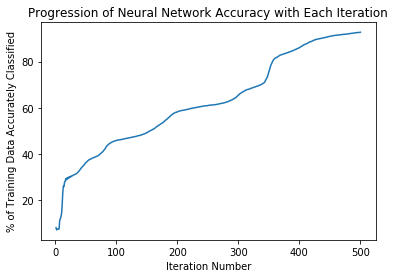

In [16]:
nn2.predict(test_data,test_labels)
print("error rate for test set =",nn2.error_rate())
print(nn2.confusion_matrix())

x = list(range(1,501))
y = list(map((lambda x: x*100),nn2.success_rates))
plt.xlabel("Iteration Number")
plt.ylabel("% of Training Data Accurately Classified")
plt.title("Progression of Neural Network Accuracy with Each Iteration")
plt.plot(x,y)

## Aufgabe 2 Logische funktionen

In [17]:
X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
y_and = np.asarray([[0,1],[0,1],[0,1],[1,0]])
y_or = np.asarray([[0,1],[1,0],[1,0],[1,0]])
y_xor = np.asarray([[0,1],[1,0],[0,1],[0,1]])

In [18]:
nn_and = NeuralNetwork(X,y_and,[3,10,2])
nn_and.train(iterations=100,gamma=3.05)

Iteration 0 | Accuracy: 0.75
Iteration 25 | Accuracy: 0.75
Iteration 50 | Accuracy: 0.75
Iteration 75 | Accuracy: 0.75
Iteration 99 | Accuracy: 1.0


In [19]:
nn_or = NeuralNetwork(X,y_or,[3,10,2])
nn_or.train(iterations=100,gamma=3.05)

Iteration 0 | Accuracy: 0.25
Iteration 25 | Accuracy: 1.0
Iteration 50 | Accuracy: 1.0
Iteration 75 | Accuracy: 1.0
Iteration 99 | Accuracy: 1.0


In [20]:
nn_xor = NeuralNetwork(X,y_xor,[3,10,2])
nn_xor.train(iterations=100,gamma=3.05)

Iteration 0 | Accuracy: 0.75
Iteration 25 | Accuracy: 1.0
Iteration 50 | Accuracy: 1.0
Iteration 75 | Accuracy: 1.0
Iteration 99 | Accuracy: 1.0
